## Assignment - 3

1. Generate a set of points around a line y = ax + b

   (a) Choose a = 2 and b = 3.

   (b) Select the range for x as [ -10 , 10 ] and generate n = 100 values for x in the interval.

   (c) Compute the values of y for each x as 
               
                              y[i] = 2x[i] + 3

   (d) Plot the line y = 2x + 3 in black color.

   (e) Generate a set of n points around the line using the equation

                              y[i] = 2x[i] + 3 + σ N(0,1)                   (1)
                              
   where σ is the standard deviation and N(0,1) is the zero mean unity variance normal distribution.
    
   (f) Show the scatter plot of these noisy points (in red color) on the same graph generated in step (d).

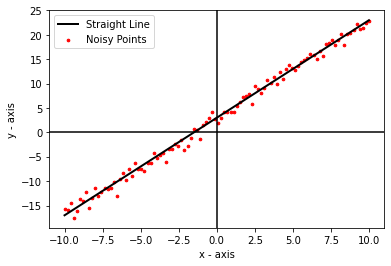

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()


## Given data.
a = 2;
b = 3;
n = 100;
x = np.linspace(-10,10,n);


## Generating a straight line.
def straight_line(x,a,b):
    y = (a*x) + b;
    return y;


## Generating a set of random points.
def random_points(x,a,b):
    y1 = (a*x) + b + np.random.normal(0,1,n);
    return y1; 


## Plotting
ax.plot(x,straight_line(x,a,b),'k',label='Straight Line',linewidth = '2');  ## Plotting straight line.
ax.scatter(x,random_points(x,a,b),c='r',marker='o',s=7,label='Noisy Points');## Plotting the random points around the straight line.
ax.set_xlabel("x - axis");
ax.set_ylabel("y - axis");
ax.axhline(color = "Black");
ax.axvline(color = "Black");
ax.legend()

2. Plot the average error surface E for different values of a and b in the interval of [ -10 : 0.1 : 10 ].

   (a) Vary both a and b in steps of 0.1 in the interval [ -10 , 10 ].

   (b) Compute the element wise error as

                              e[i] = y[i] - y'[i]
                              
   where
   
                              y'[i] = ax[i] + b
                              
   and y[i] is computed using equation (1).
   
   (c) Compute the average error as

                              E = 1/n ∑ (i=1,n) (e[i])^2
                              
   (d) Compute the average error values for all combinations of a and b.

   (e) Plot the error surface with the values of a along x-axis, that of b along y-axis and E along z-axis.

<IPython.core.display.Javascript object>


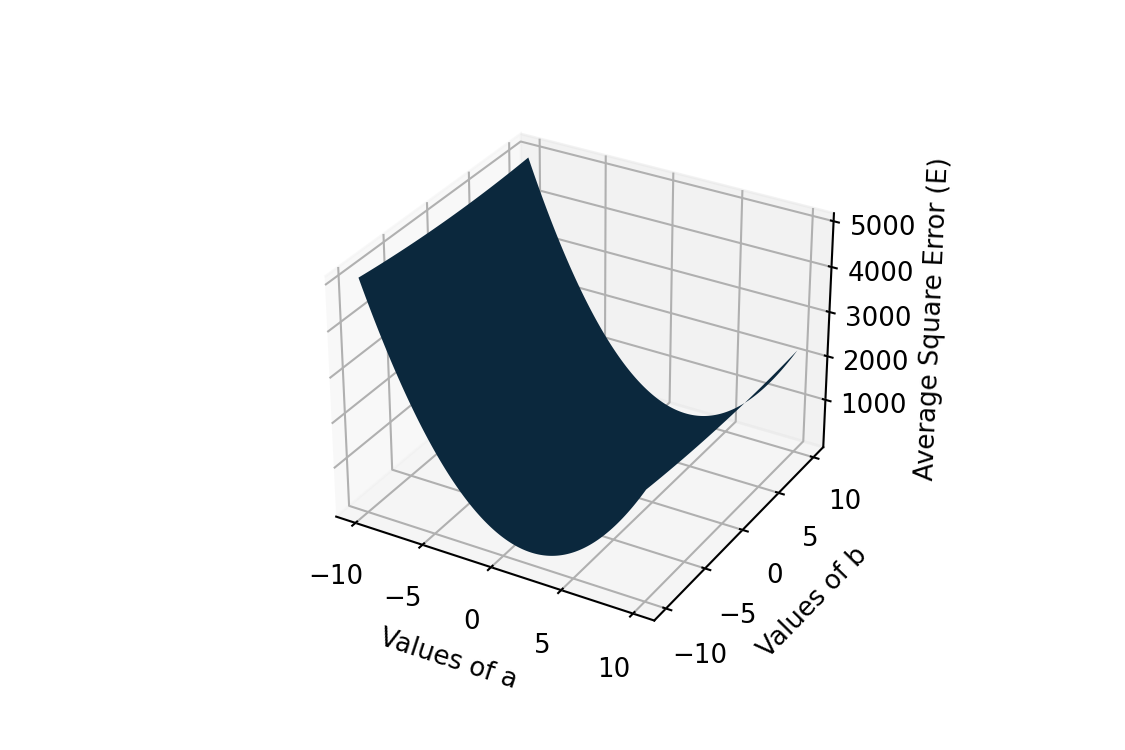

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib
from mpl_toolkits.mplot3d import Axes3D


## Creating the 3 dimensional axis.
%matplotlib notebook
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 150
fig = plt.figure()
axes = fig.add_subplot(projection='3d')


## Given data.
n = 100;
m = int(((10-(-10))/0.1)+1);
a = np.linspace(-10,10,m);
b = np.linspace(-10,10,m);
x = np.linspace(-10,10,n);


## Converting given data into a list. 
x_list = [];
for i in range(len(x)):
    x_list.append(x[i]);
a_list = [];
for j in range(len(a)):
    a_list.append(a[j]);
b_list = [];
for k in range(len(b)):
    b_list.append(b[k]);
    
    
## Declearing error variable.    
E_list = [];


## Generating the values of y.
y_points = (2*x) + 3 + np.random.normal(0,1,n);   ## Generating the points of y.
y_array = np.reshape((np.array(y_points)),(n,1)); ## Arranging y_points in array of size 0f 100 1;
y = np.matlib.repmat(y_array,1,m);                ## Creating a y matrix of size 100*201. 


## Creating a matrix AX.
x_diag = np.diag(x_list);                 ## Converting x_list data into a diagonal matrix of 100*100.
a_mat = np.matlib.repmat(a_list, n, 1);   ## Converting a_list data into a 100*201 matrix.
x_diag_a_mat = np.dot(x_diag,a_mat);      ## Multiply both matrix x_diag and a_mat.


## Calculating average error for each value of a,b and x.
for j in range(m):                            ## Applying for loop from 0 to 201.
    b_mat = np.matlib.repmat(b_list[j], n, m);## Creating a b_mat matrix of size 100*201 for each value of b.
    y_pred = x_diag_a_mat + b_mat;            ## Calculating the predicted value of y.
    e_se = np.transpose((y - y_pred)**2);     ## Calculating square error of each element of matrix and transpose it.
    for i in range(m):                        ## Applying for loop from 0 to 201.
        e_ase = (1/n)*sum(e_se[i]);           ## Calculating the average value of square error of each row.
        E_list.append(e_ase);                 ## Adding the average square error value to the list
        
        
## Arrangement values for plotting.
E = np.reshape(E_list,(m,m));            ## Converting average Square error list to the 201*201 matrix.
a_values,b_values = np.meshgrid(a,b);    ## Converting values of a and b in meshgrid for plotting surface plot.


## Plotting
axes.plot_surface(a_values,b_values,E,rstride = m,cstride = m);
axes.set_xlabel("Values of a");
axes.set_ylabel("Values of b");
axes.set_zlabel("Average Square Error (E)");

3. Solve for a and b using Pseudo inverse based approach on the points generated in question 1.

Value of a : 1.9950291426514362
Value of b : 3.0628820515443076


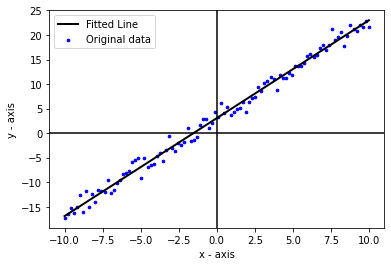

In [3]:
import numpy as np
import matplotlib.pyplot as plt


## Creating the 2 dimensional axis.
%matplotlib inline
fig, ax = plt.subplots()


## Given data.
n = 100;
x = np.linspace(-10,10,n);


## Function of generating a set of random points.
def random_points(x):
    y = (2*x) + 3 + np.random.normal(0,1,n);
    return y; 


## Generating pseudo inverse matrix.
x_concat = np.transpose(np.vstack([x, np.ones(len(x))]));     ## Concatenate of matrix of ones with matrix x.
x_i = np.linalg.inv(np.dot(np.transpose(x_concat),x_concat)); ## Calulating the inverse of matrix x.
x_pi = np.dot(x_i,np.transpose(x_concat));                    ## Calulating the pseudo inverse of matrix x.
[a,b] = np.dot(x_pi,random_points(x));                        ## Calculating the value of a and b.
print("Value of a :",a);
print("Value of b :",b);


## Function of line fitting between the points.
def fitted_line(a,b,x):
    y_fit = a*x + b;
    return y_fit;

## Plotting
ax.scatter(x,random_points(x),c='b',label='Original data',s=7,marker='o');
ax.plot(x,fitted_line(a,b,x),'k',label='Fitted Line',linewidth=2);
ax.set_xlabel("x - axis");
ax.set_ylabel("y - axis");
ax.axhline(color = "Black");
ax.axvline(color = "Black");
ax.legend()

4. Solve for a and b using the Gradient Descent approach where the values of p = (a,b)^T in the (k + 1)th iteration is updated as

                             p[k+1] = p[k] - η ∆p E|p=p[k]
              
   Vary the updated rate η and the initial values (a[0] , b[0]) and note the final solution after 100 iterations. Plot the trajectory of the solutions. (a[k] , b[k]) for varying (a[0] , b[0], η) on the contour plot of E on (a , b) plane. 

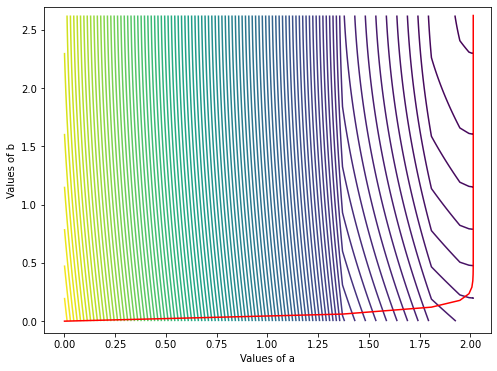

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib


## Creating the 2 dimensional axis.
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,6));


## Given data.
a = 0;
b = 0;
n = 100;
x = np.linspace(-10,10,n)


## Considering value of η.
eta = 0.01;


## Defining variable.
a_values = [];
b_values = [];
E_values = [];


## Generating the values of y.
y_points = (2*x) + 3 + np.random.normal(0,1,n);   ## Generating the points of y.
y_array = np.reshape((np.array(y_points)),(n,1)); ## Arranging y_points in array of size 0f 100*1;
y = np.matlib.repmat(y_array,1,n);                ## Creating a y matrix of size 100*100. 


## Calculating the value of a and b.
for i in range(n):
    a_values.append(a);                           ## Adding the value of a in list.
    b_values.append(b);                           ## Adding the value of a in list.
    y_pred = a*x + b;                             ## Calculating the predicted value of y based on updated a and b.
    D_a = (-2/n)*sum(x*(y_points - y_pred));      ## Calculating the change of value of a w.r.t. error.
    D_b = (-2/n)*sum(y_points - y_pred);          ## Calculating the change of value of b w.r.t. error.
    a = a - eta*D_a;                              ## Updating the value of a.
    b = b - eta*D_b;                              ## Updating the value of b.
    

## Creating a matrix AX.
x_diag = np.diag(x);                              ## Converting x data into a diagonal matrix of 100*100.
a_mat = np.matlib.repmat(a_values, n, 1);         ## Converting a_values data into a 100*100 matrix.
x_diag_a_mat = np.dot(x_diag,a_mat);              ## Multiply both matrix x_diag and a_mat.    
    

## Calculating average error for each value of a,b and x.
for j in range(n):                                ## Applying for loop from 0 to 100.
    b_mat = np.matlib.repmat(b_values[j], n, n);  ## Creating a b_mat matrix of size 100*100 for each value of b.
    y_pred = x_diag_a_mat + b_mat;                ## Calculating the predicted value of y.
    e_se = np.transpose((y - y_pred)**2);       ## Calculating square error of each element of matrix and transpose it.
    for i in range(n):                          ## Applying for loop from 0 to 100.
        e_ase = (1/n)*sum(e_se[i]);             ## Calculating the average value of square error of each row.
        E_values.append(e_ase);                 ## Adding the average square error value to the list    
        
        
## Arrangement values for plotting.
E = np.reshape(E_values,(n,n));          ## Converting average Square error list to the 100*100 matrix.
a,b = np.meshgrid(a_values,b_values);    ## Converting values of a and b in meshgrid for plotting surface plot.
    

## Plotting
ax.plot(a_values,b_values,'r');
ax.contour(a,b,E,100);
ax.set_xlabel("Values of a");
ax.set_ylabel("Values of b");
ax.set_xlim(-0.1,2.1);
ax.set_ylim(-0.1,2.7);

5. Fit a univariate linear regression model to the data provided in canada_per_capita_income.csv file considering year as the independent variable and per_capita income as the target variable. Visualize the data and the regression line on a single plot. Use this model to predict the per_capita income for the years 2020,2021,2025.

Per capita income of canada in 2020 will be 41288.694 (US$).
Per capita income of canada in 2021 will be 42117.159 (US$).
Per capita income of canada in 2025 will be 45431.019 (US$).


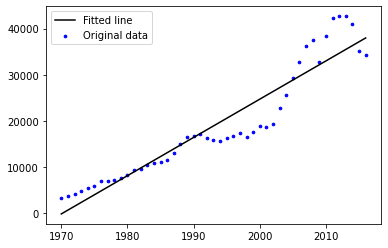

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Creating the 2 dimensional axis.
%matplotlib inline
fig, ax = plt.subplots();

## Data pre pocessing.
data = pd.read_csv('canada_per_capita_income.csv')      ## Reading CSV file. 
x = data.iloc[:,0];                                     ## Alloting the years values to x.
y = data.iloc[:,1];                                     ## Alloting the per capita income values to y.
n = len(x);

## Using pseudo inverse matrix method for calculating the value of a and b.
x_concat = np.transpose(np.vstack([x, np.ones(len(x))]));     ## Concatenate of matrix of ones with matrix x.
x_i = np.linalg.inv(np.dot(np.transpose(x_concat),x_concat)); ## Calulating the inverse of matrix x.
x_pi = np.dot(x_i,np.transpose(x_concat));                    ## Calulating the pseudo inverse of matrix x.
[a,b] = np.dot(x_pi,y);                                       ## Calculating the value of a and b.


## Function of line fitting between the points.
def fitted_line(a,b,x):
    y_fit = a*x + b;
    return y_fit;


## Plotting
ax.scatter(x,y,c='b',s=7,marker='o',label='Original data');
ax.plot(x,fitted_line(a,b,x),'k',label='Fitted line');
ax.legend();


print("Per capita income of canada in 2020 will be {:.3f}".format((a*2020)+b),"(US$).");
print("Per capita income of canada in 2021 will be {:.3f}".format((a*2021)+b),"(US$).");
print("Per capita income of canada in 2025 will be {:.3f}".format((a*2025)+b),"(US$).");

6. Fit a multivariate linear regression model to the data provided in hiring.csv file considering the experience, test score and interview score as the independent variables and salary as the target variable. Consider zeros for the empty cells while creating the model. Use this model to predict the salary for the following cases:

   (a) experience = four , test score = 8 and interview score = 8.
   
   (b) experience = four , test score = 8 and interview score = 5.
   
   (c) experience = four , test score = 5 and interview score = 8.

In [7]:
import numpy as np
import pandas as pd

## 
word = ['zero','one','two','three','four','five','six','seven','eight','nine','ten','eleven','twelve',
        'thirteen','fourteen','fifteen','sixteen','seventeen','eighteen','nineteen','twenty'];
number = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20];


## Data pre processing.
Data = pd.read_csv('hiring.csv');                  ## Reading CSV file.
Data = Data.fillna(0);                             ## Fill empty cell with 0
x1 = Data['experience'].replace(word,number);      ## Assigning experience column values to x1. 
x2 = Data['test_score(out of 10)'];                ## Assigning test_score(out of 10) column values to x2.
x3 = Data['interview_score(out of 10)'];           ## Assigning interview_score(out of 10) column values to x3.
y = Data['salary($)'];                             ## Assigning salary($) column values to y.
x = np.array([x1,x2,x3])                           ## Creating a matrix x with x1, x2 and x3.


## Using pseudo inverse matrix method for calculating the value of a, b, c and d.
x_concat = np.transpose(np.vstack([x, np.ones(len(x1))]));     ## Concatenate of matrix of ones with matrix x.
x_i = np.linalg.inv(np.dot(np.transpose(x_concat),x_concat));  ## Calulating the inverse of matrix x.
x_pi = np.dot(x_i,np.transpose(x_concat));                     ## Calulating the pseudo inverse of matrix x.
[a,b,c,d] = np.dot(x_pi,y);                                    ## Calculating the value of a, b, c and d.


## Predicting the sallary based of experience, test score and interview score.
Candidate_1 = 4*a + 8*b + 8*c + d;
Candidate_2 = 4*a + 8*b + 5*c + d;
Candidate_3 = 4*a + 5*b + 8*c + d;

print("The expected sallary of first candidate {:.0f}".format(Candidate_1),"$.");
print("The expected sallary of second candidate {:.0f}".format(Candidate_2),"$.");
print("The expected sallary of third candidate {:.0f}".format(Candidate_3),"$.");

The expected sallary of first candidate 62081 $.
The expected sallary of second candidate 55726 $.
The expected sallary of third candidate 59082 $.
